##### <center>  <img src="https://images.squarespace-cdn.com/content/v1/551a19f8e4b0e8322a93850a/1602020393443-L6M0DGZK4C75DRNR7GZH/Title_Animation.gif"  width=600> [[1]](#źr)




<h2 class="alert alert-block alert-danger">  
Projekt ten przedstawia mój tok myślenia oraz opinie! Wersja z czystą analizą dostępna jest na:    
</h2>

## Jako osoba która pracowała na kuchni i dla której temat jedzenia jako część kultury jest niezwykle fascynujący, w tym notatniku zajmę się analizą bazy danych z WHO na temat konsumpcji produktów na świecie. Moim planem jest odpowiedzieć na pytania, jakie produkty są najpopularniejsze i na co to wskazuje, jakie są różnice między kobietami i mężczyznami oraz jak te dane można by wykorzystać tworząc menu do restauracji. Myślę, że w tych danych jest wiele ciekawych informacji, które można wykorzystać do odpowiedzenia na wspomniane pytania jak i do pogłębienie wiedzy na temat tredów konsumcyjnych w różnych rejonach świata.
## może bardziej pojśc w to że czym różni się otwarcie restauracji w Europie niż na świecie? że czy różnica między kobietami i mężczyznami by sprawiała że profilowanie restauracji pod płeć ma sens? czy celowanie w ogólnoświatowe gusta ma sens czy lepiej iśc w lokalne? myśle że w to i na podstawie tego podsumowania i wnioski
### 📝 Plan jest następujący:
1. Sprawdzę jak skonstruowana jest baza danych, jakie informacje i typy danych znajdują sie w kolumnach.
1. Z tą wiedzą pozbędę się kolumn, które na pewno nie będą mi potrzebne no chyba, że takich nie będzie.
1. Następnie dokonam analizy, gdzie znajdują sie puste dane oraz gdzie jest największe ryzyko ich znajdowania się, a potem pozbędę sie ich.
1. Sprawdzę z jakich krajów i kontynentów jest najwięcej danych, żeby ocenić ich używalnośc w globalnej skali.
1. Kolejną rzeczą będzie wyciagniecie danych dla produktów spożywanych na całym świecie, w Europie oraz to samo dla mężczyzn i kobiet na świecie i w Europie.
1. Na koniec podsumuję co udało się osiągnąć, jakie były wyzwania, problemy, błędy, sukcesy.
### Taki jest plan ale co napotkam na tej drodze to się okaże. Liczę na to że będzie ciekawie! 

# <font  color='289C4E'>Spis treści:<font><a class='anchor' id='top'></a> 📕
1. [Wczytywanie danych](#hello)
1. [Usuwanie niepotrzebnych kolumn](#del_col)
1. [Ujednolicanie danych](#stand)
1. [Usuwanie duplikatów i pustych danych](#del_dup)
1. [Wyciąganie informacji z kolumn Consumers_Mean, Consumers_Median, Total_Mean, Total_Median](#colinfo)
1. [Sprawdzanie z jakich krajów pochodzą dane](#kraje)
1. [Problem z kolumną AgeClass](#ageclass)
1. [Wykres: Ilość badanych na przestrzeni lat](#sub_over_time)
    1. [Wnioski](#sub_over_time_wnio)
1. [Wykres: Ilość badanych dla poszczególnych krajów](#country_sub)
    1. [Wnioski](#country_sub_wnio)
1. [Tworzenie kolumn z kodami i nazwami kontynentów](#kont)
1. [Wykres: Procentowy udział badanych patrząc na kontynent](#kont_sub)
    1. [Wnioski](#kont_sub_wnio)
1. [Wykres: Najpopularniejsze produkty na Świecie](#food_world)
1. [Wykres: Najpopularniejsze produkty w Europie](#food_eu) 
1. [Wykresy: Porównanie wykresów najpopularniejsze produkty na świecie i w Europie](#food_world_eu)
    1. [Wnioski](#food_world_eu_wnio)
1. [Wykresy: Najpopularniejsze produkty dla mężczyzn i kobiet na Świecie](#food_world_gen) 
    1. [Wnioski](#food_world_gen_wnio)
1. [Wykresy: Najpopularniejsze produkty dla mężczyzn i kobiet w Europie](#food_eu_gen)    
    1. [Wnioski](#food_eu_gen_wnio)    
1. [Podsumowanie](#Podsumowanie)    
1. [Możliwe zakłamania](#risk)
1. [Źródła](#źr)   
    

In [283]:
# import bibliotek oraz ustawienia
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pycountry_convert as pc
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers.default = "notebook_connected" # bez tego nie wyswietlają mi sie wykresy kiedy eksportuje je do htmla
plt.style.use('fivethirtyeight')

# Wczytywanie danych <a id="hello"></a>[&uarr;](#top) [[2]](#źr)

In [284]:
food = pd.read_csv("fullcifocoss.csv", on_bad_lines='skip', sep=';', skipinitialspace = True)  # wczytanie danych do dataframe pozbywając sie rzędów, które mają za dużo pól oraz spacji
pd.set_option('display.max_columns', None) # sprawiam, że można przejrzeć wszystkie kolumny, ponieważ by deafault ilość wyświetlanych kolumn jest ograniczona
food.head()

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


# Usuwanie niepotrzebnych kolumn <a id="del_col"></a>[&uarr;](#top)

In [285]:
food.drop(columns=food.loc[:, 'Consumers_P05':'Consumers_Standard_deviation'], inplace=True)
food.drop(columns=food.loc[:, 'Total_P05':'ExtBWValue'], inplace=True)
food = food.drop(['BW'], axis=1)
food.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00
5,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,32219,0.15,0.00
6,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,66172,NaN,0.00
7,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,33953,NaN,0.00
8,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,32219,NaN,0.00
9,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,66172,3.18,0.00


In [286]:
food.shape

(544686, 13)

### Sprawdzę czy typy danych w kolumnach się zgadzają

In [287]:
food.dtypes

Country                 object
Year                     int64
FoodCode                object
FoodName                object
AgeClass                object
SourceAgeClass          object
Gender                  object
Number_of_consumers      int64
Consumers_Mean         float64
Consumers_Median       float64
Number_of_subjects       int64
Total_Mean             float64
Total_Median           float64
dtype: object

### Wszystkie kolumny mają dobre typy danych

### Ze względów estetycznych ustawię by dane miały dwie liczby po przecinku. Jest to moja preferencja, a w razie potrzeby wrócenie do ustawień deafaultych nie będzie problematyczne.

In [288]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
food.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00


### <a id="stand"></a>[&uarr;](#top) Również rzuca mi się w oczy to że female i male w kolumnie Gender zaczynają się z małej litery a All z dużej. Przypomina mi to o tym żeby ujednolicić stringi. Zrobię to dla wszystkich kolumn zawierających stringi poza FoodCode bo mogło by w przyszłosci mieć to znaczenie podczas wczytywania kodów.

In [289]:
food.loc[:, 'Country'] = food.loc[:, 'Country'].str.title()
food.loc[:, 'FoodName'] = food.loc[:, 'FoodName'].str.title()
food.loc[:, 'AgeClass'] = food.loc[:, 'AgeClass'].str.title()
food.loc[:, 'SourceAgeClass'] = food.loc[:, 'SourceAgeClass'].str.title()
food.loc[:, 'Gender'] = food.loc[:, 'Gender'].str.title()
food.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat Grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat Grain,All,All,Female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat Grain,All,All,Male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,Female,82,54.71,0.00,33953,0.13,0.00


### Wszystko bardzo ładnie się udalo i mam ujednolicone stringi.

# <a class="anchor" id="del_dup">Usuwanie duplikatów i pustych danych.</a> [&uarr;](#top)

In [290]:
food.shape

(544686, 13)

In [291]:
food = food.drop_duplicates()

In [292]:
food.shape

(523276, 13)

In [293]:
544686-519881

24805

### Tym prostym sposobem pozbyłem się 24805 duplikatów.

### Przy użyciu biblioteki missingno oraz metody isna sprawdzam, gdzie znajdują sie puste dane.


<Axes: >

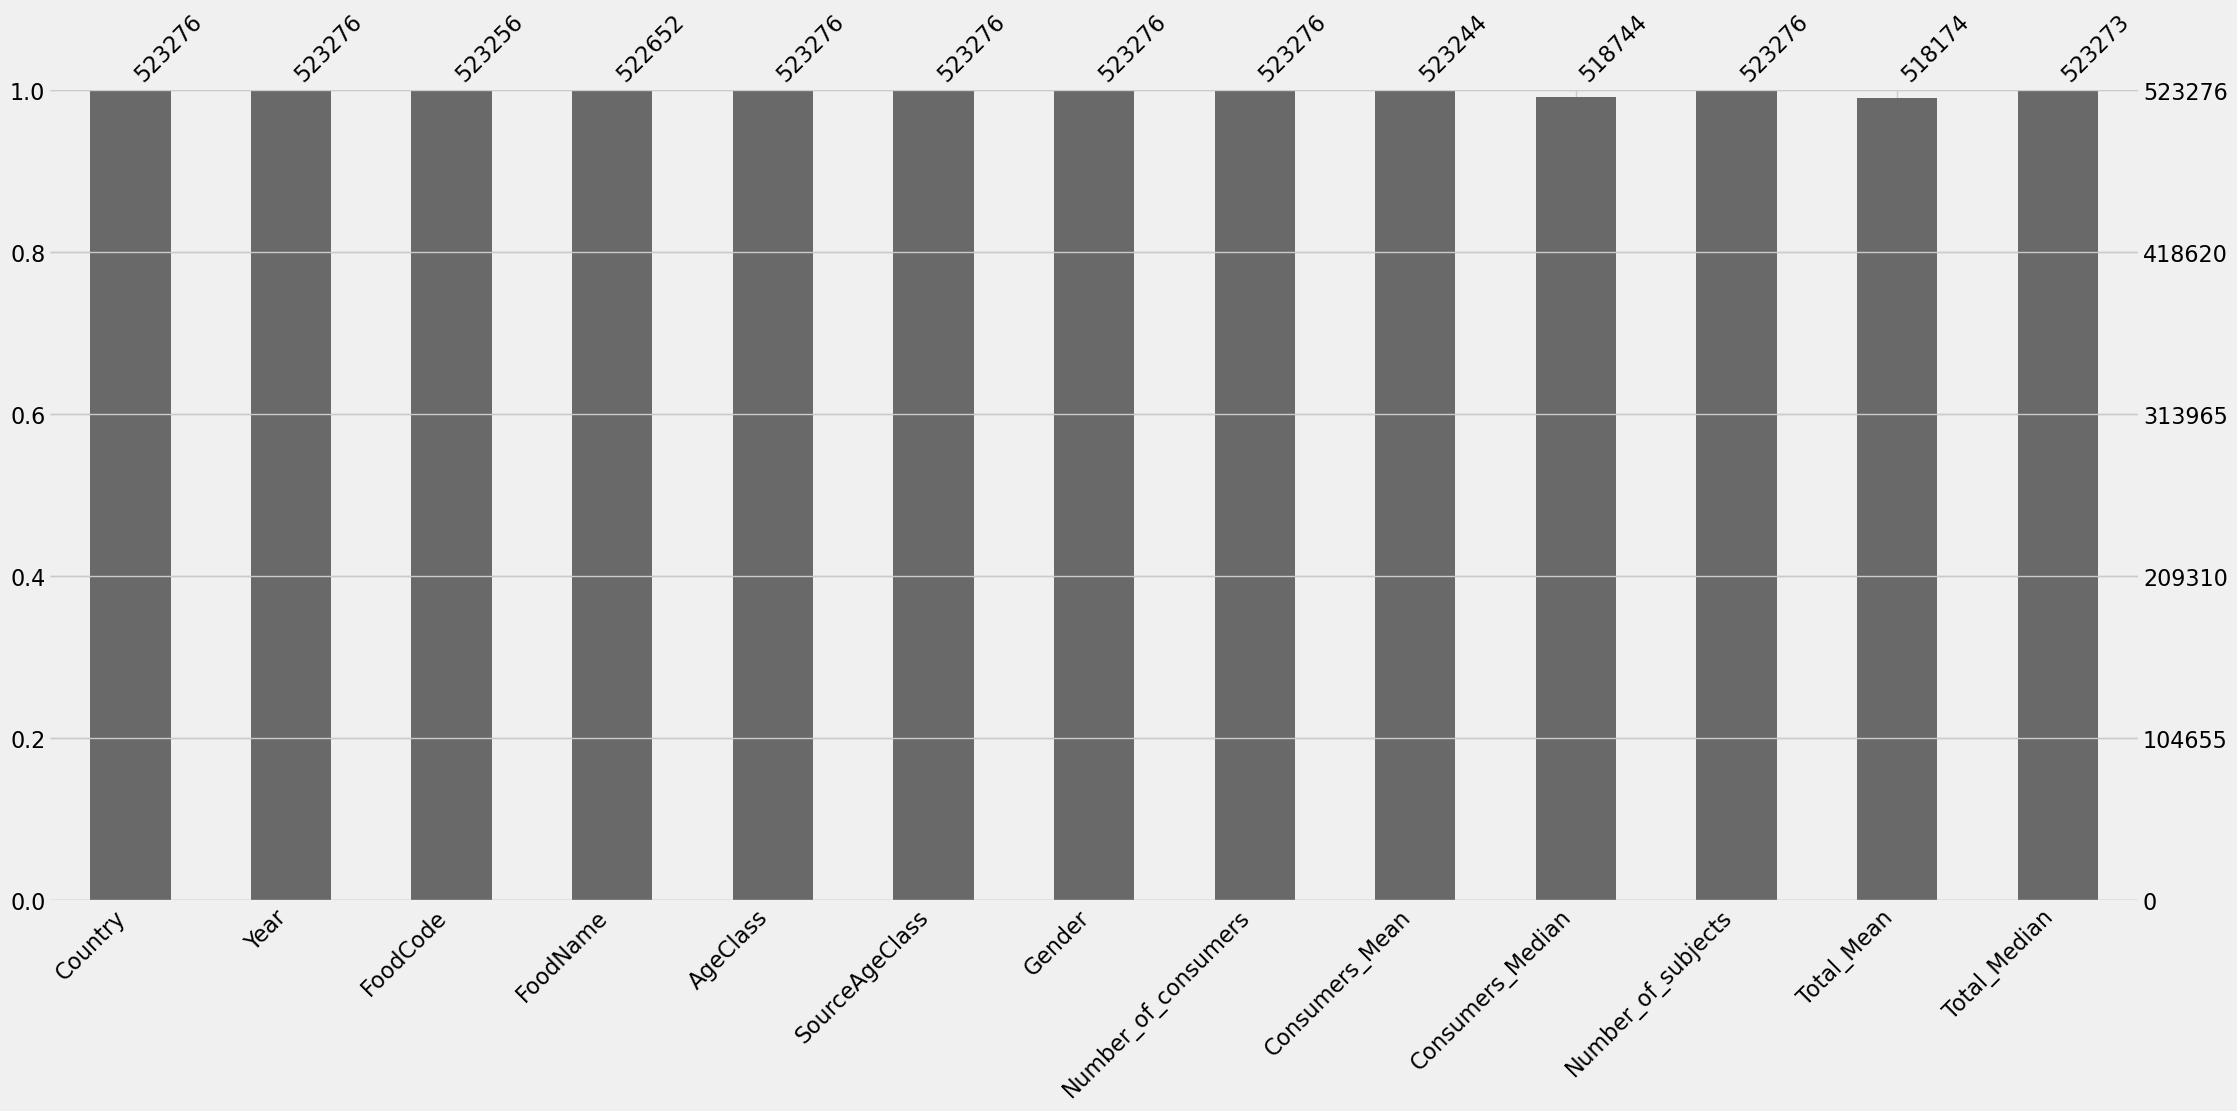

In [294]:
msno.bar(food)

In [295]:
food.isna().sum()

Country                   0
Year                      0
FoodCode                 20
FoodName                624
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### Zarówno na wykresie jak i w tabeli widać, że FoodName i FoodCode mają puste wartości, wiec zajmuję sie usunięciem tych rzędów. (na razie nie zajmuję sie innymi kolumnami z pustymi watościami, bo nie wiem czy będą użyteczne).

In [296]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail(5) # NaN w FoodCode widać dopiero na 50 ale dla wygody pozostaje default

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
540608,Republic Of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children And Adolescents,3-5 Years,All,692,2.26,0.84,804,1.95,0.59
540609,Republic Of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children And Adolescents,6-14 Years,All,1937,1.89,0.81,2376,1.54,0.48
540610,Republic Of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults And Elderly,15-49 Years,All,6798,1.80,0.76,8253,1.48,0.48
540611,Republic Of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults And Elderly,50-74 Years,All,6054,2.04,0.76,7069,1.74,0.49
540612,Republic Of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults And Elderly,>75 Years,All,1204,1.97,0.40,1650,1.44,0.11


In [297]:
food.loc[527540]

Country                Democratic Republic Of The Congo
Year                                               2016
FoodCode                                            NaN
FoodName                                            NaN
AgeClass                                            All
SourceAgeClass                                      All
Gender                                              All
Number_of_consumers                                   1
Consumers_Mean                                     3.36
Consumers_Median                                   3.36
Number_of_subjects                                  214
Total_Mean                                         0.02
Total_Median                                       0.00
Name: 527540, dtype: object

### Teraz widać, że zarówno w kolumnie FoodName i FoodCode puste dane są opisane jako NaN. Dodatkowo w kolumnie FoodCode widzę, że jest kod znacząco dłuższy od innych, które na razie widziałem i znajduje się on zawsze tam gdzie jest pusta wartość dla FoodName. Na podstawie tego decyduję, żę dobrym rozwiązaniem jest usunięcie rzędów w których FoodName ma wartości NaN bo nawet jeżeli kody są dobre to bez wiedzy jaki produkt one oznaczją są one bezużyteczne. Następnie zobaczę czy po tym nadal pozostaną długie kody i puste wartości w FoodCode. Prawdopodobnym powodem pustych danych jest błednie podany kod produktu co skutkuje tym, że nie ma również nazwy produktu ale to się okaże dalej.

In [298]:
food = food.dropna(subset=['FoodName'])

In [299]:
food.isna().sum()      

Country                   0
Year                      0
FoodCode                  0
FoodName                  0
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### Usuwanie pustych danych powiodło się. Poprzez usuwanie pustych danych z FoodName usnąłem też przy okazji puste dane z FoodCode. Teraz chcę sprawdzić czy długość kodu miała znaczenie. Zrobię to najpierw na przykładzie kodu który widziałem czyli fa6adbfab52e8a77f23df411f59c2150 oraz sprawdzając kody o długości większej niż 5 czyli standardowej długości, którą widziałem. 

In [300]:
food.loc[food['FoodCode'] == "fa6adbfab52e8a77f23df411f59c2150"]

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median


In [301]:
temp = food['FoodCode'].str.len() > 5
temp.value_counts()

FoodCode
False    516640
True       6012
Name: count, dtype: int64

### Wychodzi na to, że pozbyłem się kodu fa6adbfab52e8a77f23df411f59c2150, ale kody o długości większej niż 5 nadal istnieją i jest ich znacząco mniej, więc sprawdzę teraz czy one są poprawne, chociaż na razie wszystko wskazuje na to, że nie powinno być z nimi problemu.

In [302]:
checkpoint = food #tworzę checkpoint żeby móc łatwo wrócić do wersji przed sortowaniem
food['CodeLen'] = food['FoodCode'].str.len()
food.sort_values(by=['CodeLen'])

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat Grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
348298,Portugal,2015,A00DH,Oat Rolled Grains,Children And Adolescents,Other Children,Female,1,0.40,0.40,262,0.00,0.00,5
348297,Portugal,2015,A006R,Traditional Unleavened Breads,Children And Adolescents,Other Children,Female,1,1.94,1.94,262,0.01,0.00,5
348296,Portugal,2015,A006P,"Rusk, Wholemeal",Children And Adolescents,Other Children,Male,1,1.63,1.63,259,0.01,0.00,5
348295,Portugal,2015,A006P,"Rusk, Wholemeal",Children And Adolescents,Other Children,Female,4,0.65,0.59,262,0.01,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251182,Nigeria,2011,17348df7c5044de2950b5bce2d8bb912,(All Meat And Meat Products),Children And Adolescents,6-14 Years,Female,0,0.00,0.00,1,0.00,0.00,32
275702,United States Of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Adults And Elderly,>75 Years,All,1429,0.10,0.08,1595,0.09,0.07,32
275701,United States Of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Adults And Elderly,50-74 Years,All,4496,0.11,0.08,5215,0.10,0.06,32
275699,United States Of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Children And Adolescents,6-14 Years,All,3215,0.07,0.04,4330,0.05,0.02,32


In [303]:
temp = food.loc[food['FoodCode'] == "a93a0316b93a7c2af9305e90012af119"]
len(temp)

458

### Moje przypuszczenia zostały potwierdzone, puste dane nie są zależne od długości kodu, więc w tych kwestiach nie ma o co się martwić. 

### <a id="colinfo"></a>[&uarr;](#top) Teraz zajmę się kolumnami Consumers_Mean, Consumers_Median, Total_Mean, Total_Median. Jako że nie mam legendy to nie wiem co dokładnie one znaczą i zakładanie co znaczą oraz wiara że posiadają dobre wartości może być zgubna

In [304]:
food = checkpoint # powrót do checkpointa
food.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat Grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
1,China,2002,A000G,Oat Grain,All,All,Female,608,55.87,0.00,33953,1.00,0.00,5
2,China,2002,A000G,Oat Grain,All,All,Male,549,65.89,0.00,32219,1.12,0.00,5
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00,5
4,China,2002,A000N,Buckwheat,All,All,Female,82,54.71,0.00,33953,0.13,0.00,5


### martwi mnie kwestia że Total_Median, Consumers_Median mają wartości 0,kiedy mediana nie powinna w takim przypadku mięc zerowych wartości

In [305]:
food['Consumers_Mean'].loc[food['Consumers_Mean'] == 0].count() ,food['Consumers_Median'].loc[food['Consumers_Median'] == 0].count(),food['Total_Mean'].loc[food['Total_Mean'] == 0].count(),food['Total_Median'].loc[food['Total_Median'] == 0].count()


(25090, 31553, 102099, 493224)

In [306]:
food['Consumers_Mean'].count()


522620

### Total_median ma prawie 500 000 wartości 0. Totalnie dyskfalifikuje to używalność używalność tej kolumny. podobnie z Total_mean, niezależnie co ona znaczy niemożliwe żeby aż w 1/4 wyników miała tym bardziej że one występują w rzedach które mają dane. Dla mnie wyklucza to totalnie używalność tych kolumn. 

### Consumers_Mean i Consumers_Median mają mniej zerowych wartości ale nadal dużo ale spróbuję na przykładzie chin dla oat grain sprawdzić czy te wartości może mają jakiś sens.

In [307]:
food_all = food.loc[food['Gender'] == "All"]
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat Grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]
food_all_oat_ch

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat Grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
812,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,All,10,28.58,0.00,838,0.34,0.00,5
1251,China,2002,A000G,Oat Grain,Children And Adolescents,3-5 Years,All,20,22.00,0.00,2235,0.20,0.00,5
1782,China,2002,A000G,Oat Grain,Children And Adolescents,6-14 Years,All,107,39.97,0.00,9844,0.43,0.00,5
2487,China,2002,A000G,Oat Grain,Adults And Elderly,15-49 Years,All,545,66.67,0.00,33719,1.08,0.00,5
3267,China,2002,A000G,Oat Grain,Adults And Elderly,50-74 Years,All,438,62.06,0.00,18143,1.50,0.00,5
4020,China,2002,A000G,Oat Grain,Adults And Elderly,>75 Years,All,37,43.87,0.00,1393,1.17,0.00,5
279440,China,2002,A000G,Oat Grain,All,All,All,1157,1.12,NaN,66172,NaN,0.00,5
280252,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,All,10,2.00,NaN,838,NaN,0.00,5
280691,China,2002,A000G,Oat Grain,Children And Adolescents,3-5 Years,All,20,1.31,NaN,2235,NaN,0.00,5


### Tutaj pojawiło się pare ciekawych rzeczy. Po pierwse to to żę dane są podwojone dla wszystkich kolumn nie licząc Consumers_Mean, Consumers_Median, Total_Mean, Total_Median. Dodatkowo polowa danych z Consumers_median i total_mean ma wartości NaN. Na tym przykładzie widać że Consumers_Median i Total_Median sa dla mnie bezużytecznymi kolumnami bo niektórych przypadkach nie dadzą mi w ogóle informacji wiec już teraz moge ustalić ze ich się pozbywam wiec jedynie consumers mean może być użyteczne i to to sprawdzę czy posiada sensowne wartości. Tylko martwi mnie to żę dane są podowjone, a dane consumers mean dwa razy są różne prawdopodobnie ta kolumna też do wyrzucenia jest. 

In [308]:
food.isna().sum()

Country                   0
Year                      0
FoodCode                  0
FoodName                  0
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
CodeLen                   0
dtype: int64

### Czyli dochądzą kolejne bezużyteczne dane w tych kolumnach.

In [309]:
food_all_oat_ch['Consumers_Mean'].iloc[0] 

60.623

In [310]:
1157/66172*100 # procent konsumentów z całej puli badanych 

1.748473674666022

In [311]:
66172/1157 #liczba badanych podzielona przez liczbę konsumentów

57.19273984442524

In [312]:
(1.12+66172)/1157 # połączona liczba badanych podzielona przez liczbę konsumentów

57.193707865168534

In [313]:
food_all_oat_ch['Consumers_Mean'].iloc[1:7].sum() # suma średnich dla rzędów 1-6

263.15090000000004

In [314]:
food_all_oat_ch['Consumers_Mean'].iloc[1:7].mean() # średnia ze średnich

43.85848333333334

In [315]:
food_all_oat_ch['Number_of_consumers'].iloc[:7].mean() # średnia z pierwszyć 7 rzędów

330.57142857142856

In [316]:
food_all_oat_ch['Number_of_consumers'].iloc[0]/food_all['Number_of_consumers'].iloc[1:7].sum() # wartość dla all podzielona przez sume wartości rzędów 1-6

0.01670516892867456

### Żadne obliczenia nie daja takiej wartości jaka jest w kolumnie Consumers_Mean, więc albo są to jakieś inne dane, np. średnia ilość gramów spożywanego produktu przez ankietowanych albo coś zupełnie innego, ale bez odpowiedniej wiedzy nie można tego założyć. Znaczy to, że tych kolumn też trzeba sie pozbyć, gdyż nawet gdyby były pomocne, mogą one zawierać fałszywe wartości.
### Usuwam więc: Consumers_Mean, Consumers_Median, Total_Mean, Total_Median i dodatkowo CodeLen które i tak już nie będzie użyteczne dla mnie.

In [317]:
food.shape

(522652, 14)

In [318]:
food = food.drop(['Consumers_Mean', 'Consumers_Median', 'Total_Mean', 'Total_Median', 'CodeLen'], axis=1)
food.shape

(522652, 9)

### Wszystko poszło dobrze, pozbyłem się 5 kolumn, więc teraz czas na usuwanie duplikatów, zrobię to za pomocą drop.duplicates bo tak jak widziałem dane były podwojone i jedyne kolumny które uniemożliwiały usunięcie duplikatów przy wczesniejszym przywołaniu dropduplicates wiec samo to powinno bozbyc się niepotrzebnych danych

In [319]:
food.shape

(522652, 9)

In [320]:
food = food.drop_duplicates()
food.shape

(272016, 9)

In [321]:
544032-272016


272016

### Tak jak wczesniej zauważyłem dane były podwojone w całej bazie danych, więc bardzo dobrze, że to zauważyłem, bo inaczej mogło by to mocno zakłamać wyniki.
### <a id="kraje"></a>[&uarr;](#top) Sprawdzam z jakich krajów są dane dla wszystkich płci

In [322]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "Female"]
food_men = food.loc[food['Gender'] == "Male"]

### jeszcze przed tym dla upewnienia się sprawdze czy sumują się dobrze rzędy czy czegoś nie straciłem podczas przypisywania

In [323]:
food_all['Country'].count() + food_fem['Country'].count() + food_men['Country'].count() - food['Country'].count()

0

### takie same ilości więc super

In [324]:
food['Country'].nunique()

41

In [325]:
food_all['Country'].nunique()

41

In [326]:
food_fem['Country'].nunique()

41

In [327]:
food_men['Country'].nunique()

32

### Niestety dane dla mężczyzn są z mniejszej ilości krajów, więc należy wziąć to pod uwagę przy analizie.
### Sprawdzę jakie kraje są zawarte w tych danych, czy all. fem mają takie same kraje oraz jakich krajów nie ma w men.

In [328]:
food_all['Country'].unique()

array(['China', 'Republic Of Korea', 'Sweden', 'United Kingdom',
       'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Greece',
       'Hungary', 'Ireland', 'Latvia', 'Netherlands', 'Portugal',
       'Romania', 'Slovenia', 'Spain', 'United States Of America',
       'Brazil', 'Italy', "Lao People'S Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Uganda',
       'Bolivia (Plurinational State Of)', 'Zambia',
       'Democratic Republic Of The Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [329]:
food_fem['Country'].unique()

array(['China', 'Republic Of Korea', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Romania', 'Slovenia',
       'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'United States Of America', 'Brazil',
       'Italy', "Lao People'S Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Uganda',
       'Bolivia (Plurinational State Of)', 'Zambia',
       'Democratic Republic Of The Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [330]:
food_men['Country'].unique()

array(['China', 'Republic Of Korea', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Romania', 'Slovenia',
       'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'United States Of America', 'Brazil',
       'Italy', "Lao People'S Democratic Republic", 'Mexico', 'Malaysia',
       'Nigeria', 'Burkina Faso', 'Bolivia (Plurinational State Of)',
       'Zambia'], dtype=object)

In [331]:
np.setxor1d(food_fem['Country'].unique(), food_all['Country'].unique()) # używam setxor1d z biblioteki numpy żeby sprawdzić czy te same kraje są dla fem i all

array([], dtype=object)

In [332]:
np.setxor1d(food_fem['Country'].unique(), food_men['Country'].unique()) # sprawdzam jakich krajów nie posiadają mężczyźni

array(['Bangladesh', 'Democratic Republic Of The Congo', 'Ethiopia',
       'Guatemala', 'India', 'Mozambique', 'Pakistan', 'Philippines',
       'Uganda'], dtype=object)

### Jako że jestem przy temacie krajów to sprawdzę czy jest Polska tutaj

In [333]:
food_all.loc[food_all['Country'] == "Poland"]

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects


### Niestety nie ma jej więc wnioski będę wyciągać dla Europy.

### <a id="ageclass"></a>[&uarr;](#top) Będę chciał dane sprawdzać dla wszystkich group wiekowych bez rozdzielania dokładnie na grupy więc sprawdzę czy gdy tak filtruje to wszystko jest dobrze.

In [334]:
food_all_all = food_all.loc[food_all['AgeClass'] == "All"]
food_fem_all = food_fem.loc[food_fem['AgeClass'] == "All"]
food_men_all = food_men.loc[food_men['AgeClass'] == "All"]
food_all_all.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat Grain,All,All,All,1157,66172
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
6,China,2002,A000P,Barley Grains,All,All,All,61,66172
9,China,2002,A000T,Maize Grain,All,All,All,2422,66172
12,China,2002,A001B,Common Millet Grain,All,All,All,9069,66172


In [335]:
food_all_all['Country'].nunique()

23

In [336]:
food_fem_all['Country'].nunique()

23

In [337]:
food_men_all['Country'].nunique()

14

### O i tutaj jest duży problem przy takim rozdzieleniu ilości krajów są inne niż wczesniej sprawdzałem czyli muszę znaleźć inne rozwiązanie bo wynika z tego że ageclass all nie jest dla wszystkich krajów, niektóre kraje nie mają tego zgrupowanego

In [338]:
np.setxor1d(food_all['Country'].unique(), food_all_all['Country'].unique())

array(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Slovenia', 'Spain', 'Sweden',
       'United Kingdom'], dtype=object)

### tak wstępnie patrząc to wydzhodi na to że z Europy kraje nie mją ageclass All. Na przykładzie Francji sprawdzę jak to dokładnie wygląda.

In [339]:
food_fr = food.loc[food['Country'] == "France"] 
food_fr['AgeClass'].unique()
food_fr

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
37678,France,2007,A03MQ,Shandy,Children And Adolescents,Other Children,Male,1,239
37679,France,2007,A03MX,"Wine, Red",Children And Adolescents,Other Children,Female,17,243
37680,France,2007,A03MX,"Wine, Red",Children And Adolescents,Other Children,Male,14,239
37681,France,2007,A03MV,"Wine, White",Children And Adolescents,Other Children,Female,19,243
37682,France,2007,A03MV,"Wine, White",Children And Adolescents,Other Children,Male,13,239
...,...,...,...,...,...,...,...,...,...
173985,France,2014,A03EA,"Soft Drink, With Fruit Juice (Fruit Content Be...",Adults And Elderly,Very Elderly,All,4,118
173986,France,2014,A03EL,"Fruit Soft Drink, Orange",Adults And Elderly,Very Elderly,All,2,118
173987,France,2014,A03EX,"Soft Drink, Flavoured, No Fruit",Adults And Elderly,Very Elderly,All,1,118
173988,France,2014,A03EY,Soft Drink With Bitter Principle,Adults And Elderly,Very Elderly,All,2,118


In [340]:
food_fr_wine = food_fr.loc[food_fr['FoodName'] == "Soft Drink, Flavoured With Herbs"] 
food_fr_wine.sort_values(by='SourceAgeClass')

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
46892,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Children And Adolescents,Adolescents,Female,74,543
46893,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Children And Adolescents,Adolescents,Male,70,587
171412,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Children And Adolescents,Adolescents,All,144,1130
48840,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Adults,Female,44,1022
48841,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Adults,Male,31,751
172492,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Adults,All,75,1773
50326,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Elderly,Male,4,173
50325,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Elderly,Female,2,211
173363,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Adults And Elderly,Elderly,All,6,384
45366,France,2014,A03FD,"Soft Drink, Flavoured With Herbs",Children And Adolescents,Other Children,Female,30,424


### oznacza to że muszę znaleźć inny sposob na przedstawienie danych dla wszystkich grup wiekowych. rozwiązaniem może być nieużywanie ageclass all a za to samemu grupować dane dla danego produktu wykożystując to że każde badanie ma unikalną ilość badanych, jest tu ryzko że madania będą miały taka samą ilośc badanych ale na razie nie widzę innej opcji
### jako żenie będę rodzielać danych na konkretne grupy wiekowe to sama ich suma mi wystarczy wiec pozbycie sie all i zsumowanie wszystkich wartości robiąc to na podstawie tego że każde badanie ma inną ilośc badanych to nie powinno być tu problemu ale upewnię się
### widać że dane female+male=All więc wszystko się pod tym wzgledem zgadza oznacza to że przy rodzielaniu na płcie wszytko idzie dobrze. 

In [341]:
food_all['Number_of_subjects'].nunique()

243

### znaczy to ze jest grupując tak dane będą z 243 badań brane czyli jest to dobra próba badanych. może znajdę lepszy sposob ale na razie wydaje sie to być najlepsze. 
### sprawdzę jeszcze na przykładzie chin dla oat grain czy wszystkie wartości dodane do siebie dają tą samą wartość co dla Ageclass All. 

In [342]:
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat Grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]

food_all_oat_ch

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat Grain,All,All,All,1157,66172
812,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,All,10,838
1251,China,2002,A000G,Oat Grain,Children And Adolescents,3-5 Years,All,20,2235
1782,China,2002,A000G,Oat Grain,Children And Adolescents,6-14 Years,All,107,9844
2487,China,2002,A000G,Oat Grain,Adults And Elderly,15-49 Years,All,545,33719
3267,China,2002,A000G,Oat Grain,Adults And Elderly,50-74 Years,All,438,18143
4020,China,2002,A000G,Oat Grain,Adults And Elderly,>75 Years,All,37,1393


In [343]:
food_all_oat_ch['Number_of_consumers'].iloc[1:].sum()-food_all_oat_ch['Number_of_consumers'].iloc[0]

0

### wynik jest 0 więc znaczy to że sumy są dobre. Czyli podsumowując moim pomysłem jest usunięcie rzędów z ageclass all i potem samodzielnei grupować dane wykorzstując zależnośc że badania mają różne ilości badanych. czyli teraz usuwam rzędy z ageclass all i wstępnie sprawdzę czy to dobrze działa

In [344]:
food_fr = food_fr.loc[food_fr['Gender'] == "All"] 
food_fr['Number_of_subjects'].unique().sum() # chyba to będzie rozwiązaniem

8539

In [345]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_ctry.loc[food_ctry['Country'] == "France"]

,Country,Number_of_subjects,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers
15,France,8539,15546648,A036PA036VA037DA039CA03LGA03HGA03HHA032BA032CA...,"Olive OilsRape Seed Oil, EdibleSunflower Seed ...",Infants And ToddlersInfants And ToddlersInfant...,InfantsInfantsInfantsInfantsInfantsInfantsInfa...,AllAllAllAllAllAllAllAllAllAllAllAllAllAllAllA...,503329


In [346]:
food_ctry['Country'].nunique()

41

### wychodzi na to że ta metoda daję dobrą ilość badnaych wczęsniej zakłądana i nic nei trace w ten sposób a ilość krajów jest dobra

In [347]:
sub_over_time = food_all.groupby(['Year', 'Number_of_subjects']).sum().reset_index()
sub_over_time = sub_over_time.groupby(['Year']).sum().reset_index()
sub_over_time['Number_of_subjects'].sum()

522791

In [348]:
mask = food['AgeClass']== 'All'
food = food[~mask]

In [349]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "Female"]
food_men = food.loc[food['Gender'] == "Male"]


In [350]:
food_all.count() + food_fem.count() + food_men.count() - food.count() 

Country                0
Year                   0
FoodCode               0
FoodName               0
AgeClass               0
SourceAgeClass         0
Gender                 0
Number_of_consumers    0
Number_of_subjects     0
dtype: int64

### wychodzi 0 czyli wszystko jest dobrze i nie ma strat

In [351]:
food_all['Country'].nunique()

41

In [352]:
food_fem['Country'].nunique()

41

In [353]:
food_men['Country'].nunique()

32

### ilości krajów się zgadzają
### chyba wszystkie dane są wyczyszczone i uporządkowane żeby móc robić wykresy, wiem jak osiągnąć najbardziej zbliżony do rzeczywistości wynik wiec wiec wszystko powinno być fine
### sprawdzam przy jakim grupowaniu suma Number_of_subjects jest najwieksza i z tej będę kożystac. tak samo będę robić przy innych wykresach

In [354]:
sub_over_time = food_all.groupby(['Year', 'Number_of_subjects','SourceAgeClass']).sum().reset_index()
sub_over_time = sub_over_time.groupby(['Year']).sum().reset_index()
sub_over_time['Number_of_subjects'].sum()

312217

# 📊 Wykres: Ilość badanych na przestrzeni lat.<a id="sub_over_time"></a> [&uarr;](#top)

In [355]:
hello = px.line(sub_over_time, x="Year", y="Number_of_subjects", title="over time", labels={'Number_of_subjects':'Number of Subjects', 'FoodName': 'Food Names' } , hover_data={'Number_of_subjects':':,'})
hello.show()

# Wnioski <a id="sub_over_time_wnio"></a> [&uarr;](#top)

### Jak widać dane są głównie z 202 i 2010. Najwyraźniej wtedy było albo najwieksze badanie albo najwiecej badań. 

In [356]:
food_2002 = food_all.loc[food_all['Year'] == 2002]
food_2002 = food_2002.groupby(['Number_of_subjects','SourceAgeClass']).sum().reset_index()
food_2002['Number_of_subjects'].unique()

array([   36,   625,   838,  1393,  2235,  9844, 18143, 33719])

In [357]:
food_2010 = food_all.loc[food_all['Year'] == 2010]
food_2010 = food_2010.groupby(['Number_of_subjects','SourceAgeClass']).sum().reset_index()
food_2010['Number_of_subjects'].unique()

array([    1,     2,    12,    25,    27,    40,    49,    67,    72,
         128,   237,   289,   295,   308,   450,   463,   477,   478,
         516,   517,  1205,  1418,  1430,  1595,  2669,  4330,  5215,
        9446, 33029, 38942])

### jak widać głównie tutaj miały znaczenie duże badania ale również było troche tych badań wiec jest to zawsze plus bo zwiększa to wiarygodność i zmiejsza błąd z badań(jak to ianczej nazwać?)

In [358]:
food_ctry = food_all.groupby(['Country', 'Number_of_subjects','SourceAgeClass','AgeClass']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country', 'Number_of_subjects','SourceAgeClass']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index().sort_values(by='Number_of_subjects', ascending=False)

food_ctry['Number_of_subjects'].sum()

312217

# 📊 Wykres: Ilość badanych dla poszczególnych krajów.<a id="country_sub"></a>[&uarr;](#top)

In [359]:
food_ctry = food_ctry.sort_values(by='Number_of_subjects', ascending=False)
fig = px.bar(food_ctry, x="Country", y="Number_of_subjects", title="Number of subjects per country", labels={'Number_of_subjects':'Number of subjects', 'Country': 'Countries' },hover_data={'Number_of_subjects':':,'})
fig.update_xaxes(tickangle=40)
fig.show()

### <a id="country_sub_wnio"></a>[&uarr;](#top) Na wykresie bardzo dobrze widać jak duża jest dysproporcja, co do ilości osób w zależności od kraju. Znaczy to, że wyciągnięte wnioski mogą być zachwiane i należy o tym pamiętać podczas analizy.
### Dla dokładności sprawdzę jak duża jest ta dysproporcja i jak rozkłada się to pod względem kontynentów.

In [360]:
top5 = food_ctry['Number_of_subjects'].iloc[0:5].sum()
top5

194387

In [361]:
rest = food_ctry['Number_of_subjects'].iloc[5:].sum()
rest

117830

In [362]:
top5/rest

1.6497241789018078

### Jak widać top 5 krajów ma 1.65 razy więcej badanych niż reszta krajów, jest to bardzo duża dysporporcja, lecz nie dyskredytuje to od razu analizy wszystkich danych.
# Tworzenie kolumny z kodami i nazwami kontynentów. <a id="kont"></a>[&uarr;](#top)
### Rozbicie na kontynenty, pozwoli zobaczyć jak użyteczna będzie globalna analiza i czy nie lepiej będzie analizować, każdy kontynent odrębnie. Użyję do tego biblioteki pycountry_convert.

In [363]:
def convert(row): # funkcja przypisująca kod kontynentu w zależności od kraju
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format="default")
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

### Trzeba zamienić nazwy kilku krajów, bo biblioteka pycountry_convert korzysta z innych nazw krajów niż te które są w dataframe.

In [364]:
continent = food
ctry_change = {
	'Republic Of Korea' : 'South Korea',
    'Bolivia (Plurinational State Of)' : 'Bolivia',
    'United States Of America' : 'United States of America',
    "Lao People'S Democratic Republic" : "Lao People's Democratic Republic",
    "Democratic Republic Of The Congo" : "Democratic Republic of the Congo"
}
continent = continent.replace(ctry_change)

In [365]:
continent['ContinentCode'] = continent.apply(convert, axis=1)
continent

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode
812,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,All,10,838,AS
813,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,Female,4,376,AS
814,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,Male,6,462,AS
815,China,2002,A000T,Maize Grain,Infants And Toddlers,0-35 Months,All,28,838,AS
816,China,2002,A000T,Maize Grain,Infants And Toddlers,0-35 Months,Female,11,376,AS
...,...,...,...,...,...,...,...,...,...,...
272333,India,2015,A03LB,Tea Beverages,Adults And Elderly,15-49 Years,Female,10,242,AS
272335,India,2015,A03LB,Tea Beverages,Adults And Elderly,15-49 Years,All,10,242,AS
272337,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults And Elderly,15-49 Years,Female,8,242,AS
272339,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults And Elderly,15-49 Years,All,8,242,AS


### Mam kody kontynentów, więc niby można by tak to zostawić ale uważam, że dużo ładniej i czytelniej jest jak będą też widoczne nazwy kontynentów.

In [366]:
continent['ContinentCode'].unique()

array(['AS', 'EU', 'NA', 'SA', 'AF'], dtype=object)

In [367]:
conti_names = {	# stworzenie słownika dla kontynentów, żeby móc zamienić kody kontynentów na nazwy kontynentów
				'AS' : 'Asia',
				'EU' : 'Europe',
                'NA' : 'North America',
                'SA' : 'South America',
                'AF' : 'Africa'
                }
continent['Continent'] = continent['ContinentCode'].map(conti_names)
continent

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
812,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,All,10,838,AS,Asia
813,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,Female,4,376,AS,Asia
814,China,2002,A000G,Oat Grain,Infants And Toddlers,0-35 Months,Male,6,462,AS,Asia
815,China,2002,A000T,Maize Grain,Infants And Toddlers,0-35 Months,All,28,838,AS,Asia
816,China,2002,A000T,Maize Grain,Infants And Toddlers,0-35 Months,Female,11,376,AS,Asia
...,...,...,...,...,...,...,...,...,...,...,...
272333,India,2015,A03LB,Tea Beverages,Adults And Elderly,15-49 Years,Female,10,242,AS,Asia
272335,India,2015,A03LB,Tea Beverages,Adults And Elderly,15-49 Years,All,10,242,AS,Asia
272337,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults And Elderly,15-49 Years,Female,8,242,AS,Asia
272339,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults And Elderly,15-49 Years,All,8,242,AS,Asia


In [368]:
continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America', 'Africa'],
      dtype=object)

### Jak widać wszystko ładnie się udało, więc mogę przypisać continent do food i ponownie stworzyć dataframes dla każdej płci.

In [369]:
food = continent

food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "Female"]
food_men = food.loc[food['Gender'] == "Male"]


In [370]:
food_con = food_all.groupby(['Country','SourceAgeClass','ContinentCode','Number_of_subjects']).sum().reset_index()
food_con = food_con[['ContinentCode','Number_of_subjects']].sort_values(by='Number_of_subjects', ascending=False)

food_con.sum()

ContinentCode         SAASSAASASNAASASNANANAEUNAEUNAASEUASEUEUEUEUEU...
Number_of_subjects                                               312217
dtype: object

### Ilość subjectów jest taka jak wczesniej czyli 312217 wiec super

###  Niestety kontynenty też są zgrupowane, więc muszę odciać wszystko poza pierwszymi literami kodu, co pozwoli to dobrze podsumować.


In [371]:
food_con['ContinentCode'] = food_con['ContinentCode'].apply(lambda x: x[0:2])
food_con = food_con.groupby(['ContinentCode']).sum().reset_index().sort_values(by='Number_of_subjects', ascending=False)
food_con

,ContinentCode,Number_of_subjects
2,EU,99205
1,AS,97308
4,SA,72124
3,NA,37676
0,AF,5904


### Wszystko poszło dobrze, więc mogę teraz wizualizować, tylko jeszcze dodam nazwy kontynentów.

In [372]:
food_con['Continent'] = food_con['ContinentCode'].map(conti_names)
food_con

,ContinentCode,Number_of_subjects,Continent
2,EU,99205,Europe
1,AS,97308,Asia
4,SA,72124,South America
3,NA,37676,North America
0,AF,5904,Africa


# 📊 Wykres: Procentowy udział badanych patrząc na kontynent.<a id="kont_sub"></a> [&uarr;](#top)

In [373]:
fig = px.pie(food_con, values='Number_of_subjects', names='Continent', title='Percent of subjects per Continents',color_discrete_sequence=px.colors.sequential.RdBu, hover_data={'Number_of_subjects':':,'})
fig.show()

### <a id="kont_sub_wnio"></a> [&uarr;](#top) Na tym wykresie widać, ze rozłożenie badancyh między kontynentami nie jest takie złe. Wiadomo Afryka najgorzej wypada i gdyby chcieć wyciągnąć informacje dla Afryki, to można to robić tylko dla Afryki i nie sugerować się ogólnymi wynikami. Natomiast reszta kontynentów nawet równo się rozkłada, nadal dla dokładnych informacji należy sprawdzać konkretne kontynenty ale i tak już ogólna analiza może dać sensowne informacje.

### Teraz czas na sprawdzenie najpopularniejszych produktów

In [374]:
most_consumed_all = food_all.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_fem = food_fem.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_men = food_men.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_all[['FoodName','Number_of_consumers']].head(10)

,FoodName,Number_of_consumers
1,(All Cereals),142214
2811,"Wheat Bread And Rolls, White (Refined Flour)",135436
1836,Onions,112344
2249,"Rice Grain, Polished",105857
1997,Pig Fresh Meat,104118
2652,Tap Water,92605
2092,Potatoes,89154
375,Carrots,87843
1126,Garlic,84415
2243,Rice Grain,82719


# 📊 Wykres: Najpopularniejsze produkty na świecie. <a id="food_world"></a>[&uarr;](#top)

In [375]:
show_most_consumed_all = most_consumed_all.head(30)
px.bar(show_most_consumed_all, x="FoodName", y="Number_of_consumers", 
       	title="Most popular foods in the World", 
       	labels={'Number_of_consumers':'Number of comsumers', 'FoodName': 'Food Names' },
      	color_discrete_sequence=["green"]
      	,hover_data={'Number_of_consumers':':,'})

# 📊 Wykres: Najpopularniejsze produkty w Europie. <a id="food_eu"></a>[&uarr;](#top)

In [376]:
food_all = food.loc[food['Gender'] == "All"]
food_all_eu = food_all.loc[food_all['Continent'] == "Europe"]
most_consumed_all_eu = food_all_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)

In [377]:
most_consumed_all_eu = most_consumed_all_eu.head(30)

px.bar(most_consumed_all_eu, x="FoodName", y="Number_of_consumers", 
       title="Most popular food in Europe", 
       labels={'Number_of_consumers':'Number of comsumers', 'FoodName': 'Food Names' },
       color_discrete_sequence=["blue"],
       hover_data={'Number_of_consumers':':,'})

### Dla wygody porównywania dodamn te wykresy obok siebie.

# 📊 Wykresy: Porównanie wykresów najpopularniejsze produkty na świecie i w Europie <a id="food_world_eu"></a>[&uarr;](#top)

In [378]:
most_consumed_all_eu = most_consumed_all_eu.head(15)
show_most_consumed_all = show_most_consumed_all.head(15)
first_line = go.Bar(x=most_consumed_all_eu["FoodName"], y=most_consumed_all_eu["Number_of_consumers"], name="Europe", marker=dict(color='blue'), hovertemplate = 'Number of consumers=%{y:,}')
second_line = go.Bar(x=show_most_consumed_all["FoodName"], y=show_most_consumed_all["Number_of_consumers"], name="World", marker=dict(color='green'), hovertemplate = 'Number of consumers=%{y:,}')
fig = make_subplots(rows=1, cols=2)
fig.add_trace(first_line,row=1, col=1)
fig.add_trace(second_line,row=1, col=2)
fig.update_layout(title_text="Most popular foods for Europe and World")
fig.update_xaxes(tickangle=40)
fig.show()

### <a id="food_world_eu_wnio"></a>[&uarr;](#top) Porównując dwa wykresy widać, że Europa zamiast płatków śniadaniowych na pierszym miejscu ma wodę z kranu. Może to być połączone z wyższym bezpieczeństwem wody z kranu w Europie [[3]](#źr). Następnie należy sie zastanowić nad wysokim miejscem pieczywa białego, cebuli, marchewki, masła, kurczaka, pomidorów, czosnku, oliwy z oliwek i mleka. Powodem może być duży wpływ Francji i Włoch na kuchnię Europy.
### Mleko które też jak widać częściej jest spożywane w Europie niż w reszcie świata, co może wynikać z mniejszej nietoleracji laktozy w Europie [[5]](#źr). Wysokie miejsce margaryny, soli i cukru może tłumaczyć częste zachorowania na wysokie ciśnienie tętnicze[[4]](#źr).

# 📊 Wykresy: Najpopularniejsze produkty u mężczyzn i kobiet. <a id="food_world_gen"></a>[&uarr;](#top)

In [379]:
show_most_consumed_men = most_consumed_men.head(15)
show_most_consumed_fem = most_consumed_fem.head(15)
first_line = go.Bar(x=show_most_consumed_men["FoodName"], y=show_most_consumed_men["Number_of_consumers"], name="Male", hovertemplate = 'Number of consumers=%{y:,}')
second_line = go.Bar(x=show_most_consumed_fem["FoodName"], y=show_most_consumed_fem["Number_of_consumers"], name="Female", hovertemplate = 'Number of consumers=%{y:,}')
fig = make_subplots(rows=1, cols=2)
fig.add_trace(first_line,row=1, col=1)
fig.add_trace(second_line,row=1, col=2)
fig.update_layout(title_text="Most popular foods for men and women")
fig.update_xaxes(tickangle=40)
fig.show()

### <a id="food_world_gen_wnio"></a>[&uarr;](#top) Nie ma dużej różnicy między płciami jedynie kobiety mają na wyższym miejscu płatki śniadaniowe oraz warzywa i ryż, a natomiast mężczyźni mają na wyższym miejscu białą mąkę, białe pieczywo i mięso wieprzowe.

# Wykresy: najpopularniejsze produkty dla mężczyzn i kobiet w Europie. <a id="food_eu_gen"></a>[&uarr;](#top)

In [380]:
food_fem_eu = food_fem.loc[food_fem['Continent'] == "Europe"]
food_men_eu = food_men.loc[food_men['Continent'] == "Europe"]
most_consumed_fem_eu = food_fem_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_men_eu = food_men_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)

show_most_consumed_men_eu = most_consumed_men_eu.head(15)
show_most_consumed_fem_eu = most_consumed_fem_eu.head(15)

first_line = go.Bar(x=show_most_consumed_men_eu["FoodName"], y=show_most_consumed_men_eu["Number_of_consumers"], name="Male", hovertemplate = 'Number of consumers=%{y:,}')
second_line = go.Bar(x=show_most_consumed_fem_eu["FoodName"], y=show_most_consumed_fem_eu["Number_of_consumers"], name="Female", hovertemplate = 'Number of consumers=%{y:,}')
fig = make_subplots(rows=1, cols=2)
fig.add_trace(first_line,row=1, col=1)
fig.add_trace(second_line,row=1, col=2)
fig.update_layout(title_text="Most popular foods for men and women in EU")
fig.update_xaxes(tickangle=40)
fig.show()

### <a id="food_eu_gen_wnio"></a>[&uarr;](#top) W Europie podobnie jak na świecie małe różnice między płciami. Jedynie mężczyźni spożywają wiecej mięsa kurczaka oraz soli. Największa różnica jest w przypadku mięsa wieprzowego, u kobiet wypada z top15 a u mężczyzn zajmuje 10 miejsce. Kobiety jedynie spożywają więcej cukru.

# Podsumowanie 🧠 <a id="Podsumowanie"></a>[&uarr;](#top)
### Jak widać nawet w bazach danych branych z renomowanych źródeł znajdują sie puste dane, błędy i niejasności. To jak dużą część tego notatnika zajmowało czyszczenie danych i obchodzenie problemów pokazuje jak przydatna jest czysta i dobrze zbudowana baza danych.
### Z uporządkowanych danych dało się wywnioskować to, że: 
1. Na świecie płatki śniadaniowe, mięso wieprzowe, ryż są bardziej popularne niż w Europie
1. W Europie bardziej popularne niż na świecie są mięso z kurczaka, mleko, ryż, margaryna, oliwa z oliwek, banany, masło
1. Woda z kranu jest popularniejsza w Europie niż na świecie
1. Nie ma wielu różnic między płciami jeżeli chodzi o spożywane produkty
1. Mężczyźni w Europie spożywają wiecej mięsa wieprzowego oraz soli od kobiet
1. Kobiety w Europie spożywają więcej cukru od mężczyzn
### Mam nadzieję, że była to przyjemna lektura i pokazała ciekawe zależności w świecie jedzenia. Do zobaczenia.

# Możliwe zakłamania: ⚠️<a id="risk"></a>[&uarr;](#top)
1. Założenie, że każde badanie ma różną ilość badanych i w ten sposób grupowanie badanych.
1. Brak grupy wiekowej All dla wszystkich krajów.
1. Własne opinie i przeświadczenia.
1. Brak legendy do bazy danych.
1. Dane mężczyzn są z mniejszej ilości krajów.
1. Brak Polski i sprawdzanie dlanych dla Europy

# Źródła:📱  [&uarr;](#top) <a id="źr"></a>
1. Gif: https://www.slynyrd.com/blog/2020/9/30/pixelblog-30-food 
1. Baza danych: https://apps.who.int/foscollab/Download/DownloadConso
1. Dane na temat jakości wody na świecie: https://worldpopulationreview.com/country-rankings/water-quality-by-country
	1. https://vividmaps.com/tap-water-safe-to-drink/
1. Badania na temat wpływu soli i cukru na ciśnienie tętnicze: https://sci-hub.se/10.1007/s00424-014-1677-x
	1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4896734/
    1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6770596/
1. Dane na temat nietolerancji laktozy na świecie: https://worldpopulationreview.com/country-rankings/lactose-intolerance-by-country